In [1]:
import numpy as np
import matplotlib.pyplot as plt

We define exponential function given by $f(x) = e^{sin(2x)}$ and its derivative $f'(x) = 2e^{sin(2x)}cos(2x)$.

In [2]:
def f_exp(x):
    return np.exp(np.sin(2 * x))

In [3]:
def f_exp_prime(x):
    return  np.exp(np.sin(2 * x)) * 2 * np.cos(2 * x)

We calculate numerical value of the derivative of the exponential function at $x = 0.5$.

In [4]:
x = 0.5
f_prime_val_exp = f_exp_prime(x)
print("Numerical value of first order derivative of f(x): " ,f_prime_val_exp)

Numerical value of first order derivative of f(x):  2.506761534986894


In [5]:
n_values_sine = np.arange(1, 12, dtype=float)
h_values_sine = 10 ** (-n_values_sine)

- We estimate the value of the derivative of the exponential function using the formula:
$f'(x) \approx \frac{f(x + h) - f(x - h)}{h}$
- We calculate the absolute error of estimate and function value at $x = 0.5$.

In [6]:
f_exp_prime_numerical = ((f_exp(x + (h_values_sine /2)) - f_exp(x - (h_values_sine/2))) / h_values_sine)
absolute_errors_exp = np.abs(f_exp_prime_numerical - f_prime_val_exp)

for i in range(len(n_values_sine)):
    print(n_values_sine[i], absolute_errors_exp[i])

1.0 0.013465609469773376
2.0 0.00013504724930957224
3.0 1.3505120728396491e-06
4.0 1.350778777720052e-08
5.0 1.49584344910636e-10
6.0 2.5009594395442036e-10
7.0 1.1382743636545456e-09
8.0 1.890184275765705e-08
9.0 6.991599921235547e-08
10.0 2.1505300500379576e-06
11.0 1.1172146245463921e-05


We check the optimal error value - obtained and theoretical.

In [7]:
min_error = np.argmin(absolute_errors_exp)
optimal_h = h_values_sine[min_error]
print("Optimal Error: ", optimal_h)
print("Theoretical Optimal Value: ", np.cbrt(24*2.220446049250313E-16))

Optimal Error:  1e-05
Theoretical Optimal Value:  1.7466953163960752e-05


We plot the absolute errors of the numerical derivative of the exponential function.

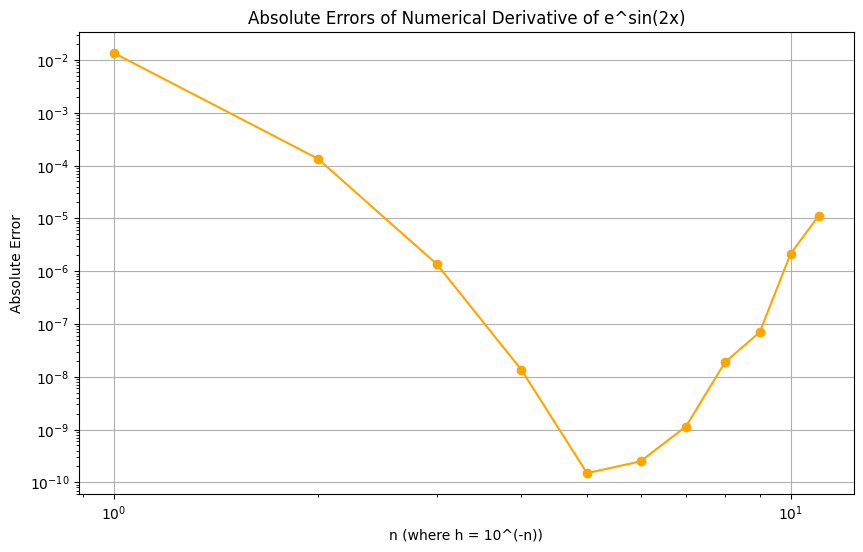

In [8]:
plt.figure(figsize=(10, 6))
plt.loglog(n_values_sine, absolute_errors_exp, marker='o', color='orange')
plt.title(r"Absolute Errors of Numerical Derivative of e^sin(2x)")
plt.xlabel("n (where h = 10^(-n))")
plt.ylabel("Absolute Error")
plt.grid(True)
plt.show()

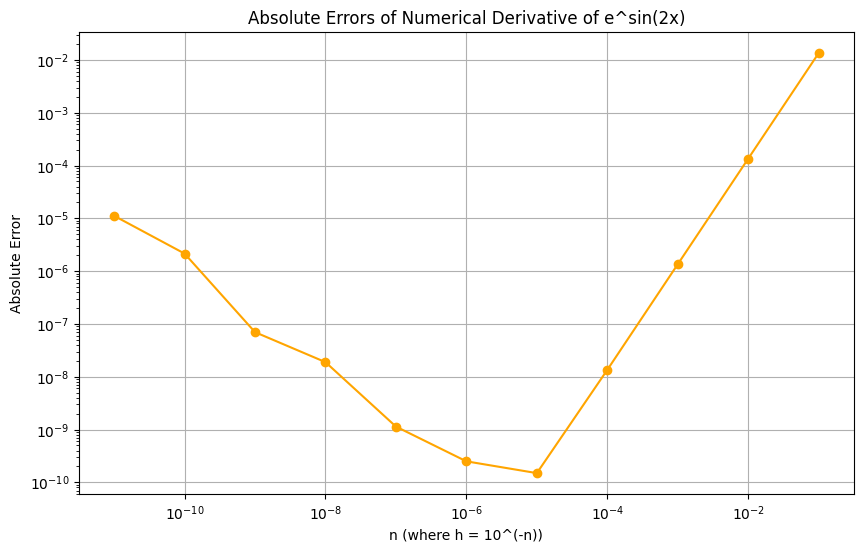

In [9]:
plt.figure(figsize=(10, 6))
plt.loglog(h_values_sine, absolute_errors_exp, marker='o', color='orange')
plt.title(r"Absolute Errors of Numerical Derivative of e^sin(2x)")
plt.xlabel("n (where h = 10^(-n))")
plt.ylabel("Absolute Error")
plt.grid(True)
plt.show()

In [10]:
import math
import sympy as sp

In [11]:
x = sp.symbols('x')
f = sp.exp(sp.sin(2 * x))
first_derivative = sp.diff(f, x)
second_derivative = sp.diff(first_derivative, x)
second_derivative

-4*exp(sin(2*x))*sin(2*x) + 4*exp(sin(2*x))*cos(2*x)**2

We define the second derivative of the exponential function 
$f''(x) = -4e^{sin(2x)}sin(2x) + 4e^{sin(2x)}cos^2(2x)$

In [12]:
def f_exp_second_derivative(x):
    return -4*np.exp(np.sin(2 * x))*np.sin(2 * x) + 4*np.exp(np.sin(2 * x))*math.pow(np.cos(2 * x),2)

In [13]:
value_at_0_5 = second_derivative.evalf(subs={x: 0.5})
value_at_0_5

-5.09928148168278

In [14]:
x = 0.5
f_2nd_numerical= f_exp_second_derivative(x)

In [15]:
n_values_sine = np.arange(1, 12, dtype=float)
h_values_sine = 10 ** (-n_values_sine)

- We estimate the value of the second derivative of the exponential function using the formula 
$f''(x) \approx \frac{f(x + \frac{h}{2}) - 2f(x) + f(x - \frac{h}{2})}{h^2}$

In [16]:
f_2nd_dev_numerical = (4 * (f_exp(x + (h_values_sine / 2)) - 2 * f_exp(x) + f_exp(x - (h_values_sine / 2)))) / np.power(h_values_sine, 2)

- We calculate the absolute error of estimate and function value at $x = 0.5$.

In [17]:
absolute_errors_exp_2nd_dev = np.abs(f_2nd_dev_numerical - f_2nd_numerical)

for i in range(len(n_values_sine)):
    print(n_values_sine[i], absolute_errors_exp[i])

1.0 0.013465609469773376
2.0 0.00013504724930957224
3.0 1.3505120728396491e-06
4.0 1.350778777720052e-08
5.0 1.49584344910636e-10
6.0 2.5009594395442036e-10
7.0 1.1382743636545456e-09
8.0 1.890184275765705e-08
9.0 6.991599921235547e-08
10.0 2.1505300500379576e-06
11.0 1.1172146245463921e-05


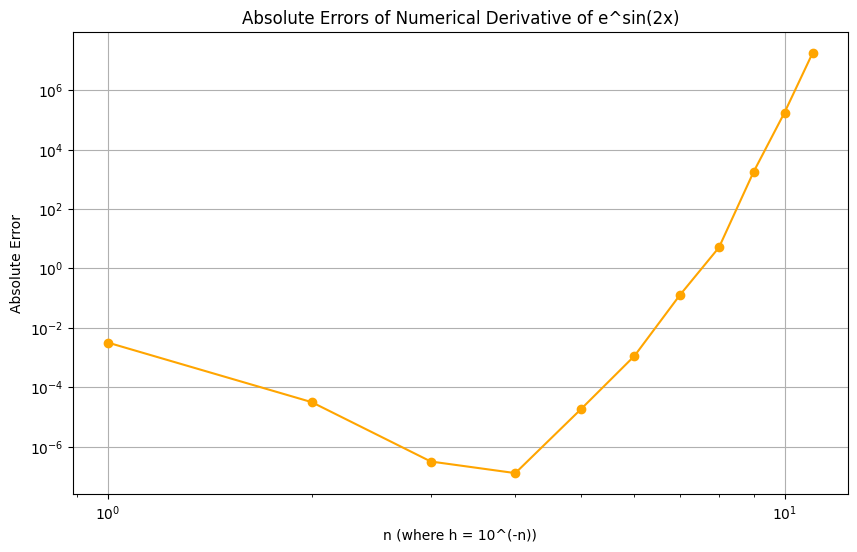

In [18]:
plt.figure(figsize=(10, 6))
plt.loglog(n_values_sine, absolute_errors_exp_2nd_dev, marker='o', color='orange')
plt.title(r"Absolute Errors of Numerical Derivative of e^sin(2x)")
plt.xlabel("n (where h = 10^(-n))")
plt.ylabel("Absolute Error")
plt.grid(True)
plt.show()

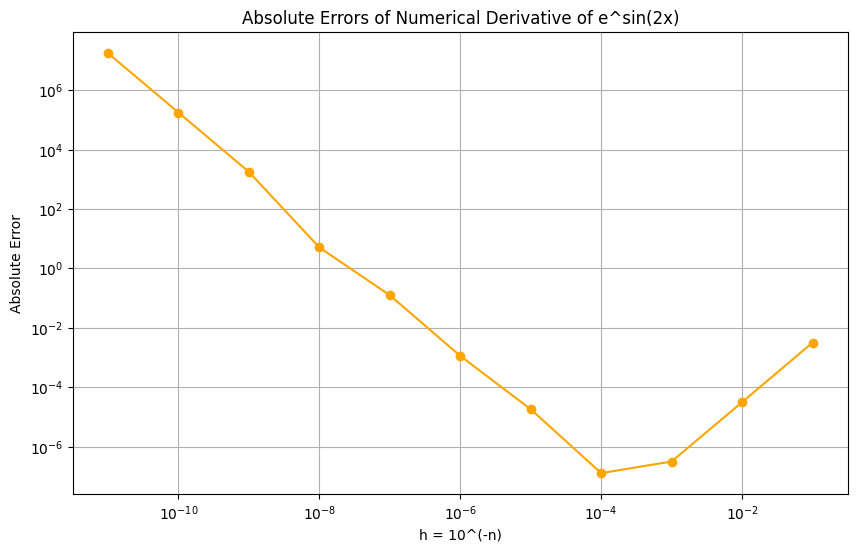

In [19]:
plt.figure(figsize=(10, 6))
plt.loglog(h_values_sine, absolute_errors_exp_2nd_dev, marker='o', color='orange')
plt.title(r"Absolute Errors of Numerical Derivative of e^sin(2x)")
plt.xlabel("h = 10^(-n)")
plt.ylabel("Absolute Error")
plt.grid(True)
plt.show()

In [20]:
min_error_index = np.argmin(absolute_errors_exp_2nd_dev)
optimal_h = h_values_sine[min_error_index]
print("Optimal Error h:", optimal_h)
print("Theoretical Optimal Value h:", np.cbrt(24 * 2.220446049250313E-16))

Optimal Error h: 0.0001
Theoretical Optimal Value h: 1.7466953163960752e-05


Conclusions:
By using the central differance method, we analyzed how different values of h impact the accuracy of derivative approximations, trying to identify optimal h that error is minimum.

1. Error Behavior Across Values of h: As h decreases, the error decreases. This is because the step size is smaller, and the approximation is closer to the true value. However, as h becomes too small, the error increases due to round-off errors.
2. Optimal Values of h:
- Based on the plots we read optimal step size h for minimizing absolute error. For the first derivative we obtained optimal h = 1.0E-05 and for the second derivative we obtained optimal h = 1.0E-04.
- Theoretical calculations using machine epsilon confirm these approximations 